In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
data_df = pd.read_csv("Data.csv")
state_data_df = pd.read_csv("State_data.csv")
ncap_funding_df = pd.read_csv("NCAP_Funding.csv")

In [119]:
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'])

In [120]:
file_path = "Data.csv"
df = pd.read_csv(file_path)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df_cleaned = df.dropna(subset=['state', 'PM2.5'])
df_cleaned.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
6,2017-01-01,"Alandur Bus Depot, Chennai - CPCB",43.401979,NaN,"MKN Rd, St Thomas Mount, Chennai, Tamil Nadu 6...",Chennai,12.909916,80.107654,Tamil Nadu
10,2017-01-01,"Anand Vihar, Delhi - DPCC",199.514167,360.567708,NaN,Delhi,28.647622,77.315809,Delhi
13,2017-01-01,"Ardhali Bazar, Varanasi - UPPCB",166.322111,213.937000,"Ordali Bazar, Tagore Town, Orderly Bazar, Vara...",Varanasi,25.350599,82.908307,Uttar Pradesh
23,2017-01-01,"BTM Layout, Bengaluru - CPCB",26.065000,NaN,NaN,Bengaluru,12.913522,77.595080,Karnataka
24,2017-01-01,"BWSSB Kadabesanahalli, Bengaluru - CPCB",19.536087,NaN,NaN,Bengaluru,12.935205,77.681449,Karnataka


# Spatial aggregation

1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years? 

In [121]:
state_avg_pm25 = df.groupby("state")["PM2.5"].mean()

state_max_pm25 = state_avg_pm25.idxmax()
max_pm25_value = state_avg_pm25.max()

print("Average PM2.5 concentration across all states:")
print(state_avg_pm25.sort_values(ascending=False))

print(f"\nState with the highest average PM2.5 concentration: {state_max_pm25}")
print(f"Average PM2.5 level: {max_pm25_value:.2f}")

Average PM2.5 concentration across all states:
state
Delhi                104.100918
Bihar                 76.918759
Haryana               72.371070
Uttar Pradesh         70.893996
Himachal Pradesh      62.516878
Assam                 57.962372
Tripura               57.927642
Chandigarh            56.666803
West Bengal           54.611086
Jharkhand             54.281545
Rajasthan             54.230341
Gujarat               52.462657
Punjab                52.243166
Odisha                52.109504
Madhya Pradesh        45.874375
Maharashtra           43.491415
Telangana             38.114469
Uttarakhand           36.788767
Andhra Pradesh        35.049347
Manipur               34.911856
Nagaland              33.439550
Tamil Nadu            31.289620
Kerala                29.404793
Karnataka             28.894840
Chhattisgarh          28.761571
Jammu and Kashmir     28.574696
Meghalaya             24.513390
Puducherry            22.854171
Arunachal Pradesh     22.674513
Sikkim             

2.  Which state (consider all stations in that state) had the most days with hazardous PM2.5 
levels (above 300 µg/m³) for the year 2023? 

In [122]:
df["Year"] = df["Timestamp"].dt.year
df_2023 = df[df["Year"] == 2023]

hazardous_threshold = 300


df_2023["Date"] = df_2023["Timestamp"].dt.date
hazardous_days = df_2023[df_2023["PM2.5"] > hazardous_threshold]

hazardous_days_count = hazardous_days.groupby("state")["Date"].nunique()

state_max_hazardous_days = hazardous_days_count.idxmax()
max_hazardous_days = hazardous_days_count.max()


print("Number of hazardous PM2.5 days (>300 µg/m³) per state in 2023:")
print(hazardous_days_count.sort_values(ascending=False))

print(f"\nState with the most hazardous PM2.5 days: {state_max_hazardous_days}")
print(f"Total hazardous days: {max_hazardous_days}")

Number of hazardous PM2.5 days (>300 µg/m³) per state in 2023:
state
Delhi             49
Bihar             47
Maharashtra       30
Uttar Pradesh     24
Assam             21
Haryana           21
Karnataka         14
Rajasthan         14
Madhya Pradesh     8
Gujarat            4
Tamil Nadu         3
Andhra Pradesh     2
Jharkhand          1
Odisha             1
Telangana          1
Tripura            1
Name: Date, dtype: int64

State with the most hazardous PM2.5 days: Delhi
Total hazardous days: 49


C:\Users\san23\AppData\Local\Temp\ipykernel_26944\1534683485.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023["Date"] = df_2023["Timestamp"].dt.date


3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [123]:
state_variability = df_2023.groupby("state")["PM2.5"].std()
highest_variability_state = state_variability.idxmax()
highest_variability_value = state_variability.max()
print(f"State with highest PM2.5 variability in 2023: {highest_variability_state} (Std Dev: {highest_variability_value:.2f})")

State with highest PM2.5 variability in 2023: Delhi (Std Dev: 82.80)


4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)? 

In [124]:
covid_data = data_df[(data_df['Timestamp'].dt.year >= 2020) & (data_df['Timestamp'].dt.year <= 2021)]

state_avg_pm25_covid = covid_data.groupby('state')['PM2.5'].mean()

lowest_pm25_state = state_avg_pm25_covid.idxmin()
lowest_pm25_value = state_avg_pm25_covid.min()

print(f"State with lowest PM2.5 levels during COVID (2020-2021): {lowest_pm25_state} ({lowest_pm25_value:.2f} µg/m³)")

State with lowest PM2.5 levels during COVID (2020-2021): Mizoram (14.32 µg/m³)


# Temporal Aggregation

1.  Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020. 

In [125]:
data_aug_2020 = data_df[(data_df['Timestamp'].dt.year == 2020) & (data_df['Timestamp'].dt.month == 8)]
highest_pm25_station = data_aug_2020.loc[data_aug_2020['PM2.5'].idxmax(), 'station']
print(f"Station with highest PM2.5 in August 2020: {highest_pm25_station}")

Station with highest PM2.5 in August 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB


2.  For the year 2018, calculate the average PM2.5 concentration for each season 
(Seasons being Winter: December-February, Summer: March-May, and Monsoon: 
June-September) for stations  Lal Bahadur Shastri Nagar,  Kalaburagi - KSPCB  . 
Identifying the season with the highest pollution. 

In [126]:
data_2018 = data_df[(data_df['Timestamp'].dt.year == 2018) & (data_df['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB')]

seasons = {
    "Winter": [12, 1, 2],
    "Summer": [3, 4, 5],
    "Monsoon": [6, 7, 8, 9]
}

seasonal_avg_pm25 = {}
for season, months in seasons.items():
    seasonal_avg_pm25[season] = data_2018[data_2018['Timestamp'].dt.month.isin(months)]['PM2.5'].mean()

highest_pollution_season = max(seasonal_avg_pm25, key=seasonal_avg_pm25.get)
print(f"Season with highest PM2.5 pollution in 2018: {highest_pollution_season}")

Season with highest PM2.5 pollution in 2018: Winter


3.  Compare the average PM2.5 levels during weekends and weekdays for the station  Lal 
Bahadur Shastri Nagar, Kalaburagi - KSPCB  over the  year 2021. Create a plot to 
show these trends Steps: 
a.  Calculate the  monthly average PM2.5  for weekdays and  weekends separately 
b.  X-axis:  Months (January to December). 
c.  Y-axis:  Average PM2.5 levels. 
d.  Use  two lines  : one for the monthly average PM2.5 levels  on  weekdays  and one 
for  weekends 

C:\Users\san23\AppData\Local\Temp\ipykernel_26944\1272183801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['weekday'] = data_2021['Timestamp'].dt.weekday
C:\Users\san23\AppData\Local\Temp\ipykernel_26944\1272183801.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['is_weekend'] = data_2021['weekday'] >= 5


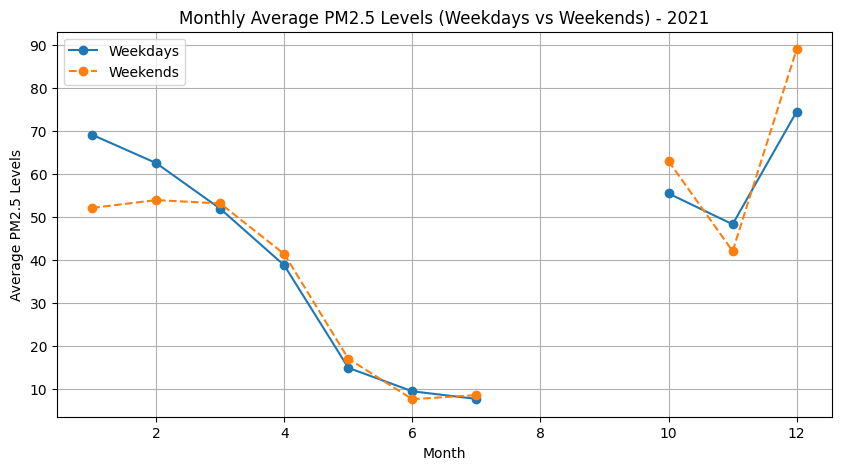

In [127]:
data_2021 = data_df[(data_df['Timestamp'].dt.year == 2021) & (data_df['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB')]
data_2021['weekday'] = data_2021['Timestamp'].dt.weekday

data_2021['is_weekend'] = data_2021['weekday'] >= 5

monthly_avg_pm25 = data_2021.groupby([data_2021['Timestamp'].dt.month, 'is_weekend'])['PM2.5'].mean().unstack()

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25[False], marker='o', label='Weekdays', linestyle='-')
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25[True], marker='o', label='Weekends', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 Levels')
plt.title('Monthly Average PM2.5 Levels (Weekdays vs Weekends) - 2021')
plt.legend()
plt.grid(True)
plt.show()

# Spatio-temporal aggregation

1.  For each state, calculate the percentage increase or decrease in PM2.5 levels during 
monsoon months (June to September) compared to summer months (March to May). 
Which state has the most difference (increase or decrease) for the year 2022? 

In [128]:
df = pd.read_csv("Data.csv", parse_dates=["Timestamp"])

df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month

df_2022 = df[df["Year"] == 2022]

summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]

seasonal_pm25 = df_2022.groupby(["state", "Month"])["PM2.5"].mean().reset_index()

summer_avg = seasonal_pm25[seasonal_pm25["Month"].isin(summer_months)].groupby("state")["PM2.5"].mean()
monsoon_avg = seasonal_pm25[seasonal_pm25["Month"].isin(monsoon_months)].groupby("state")["PM2.5"].mean()


pm25_change = ((monsoon_avg - summer_avg) / summer_avg) * 100

state_max_change = pm25_change.abs().idxmax()
max_change_value = pm25_change[state_max_change]

print("Percentage change in PM2.5 levels from Summer to Monsoon (2022) per state:")
print(pm25_change.sort_values(ascending=False))

print(f"\nState with the most significant difference: {state_max_change}")
print(f"Percentage change: {max_change_value:.2f}%")

Percentage change in PM2.5 levels from Summer to Monsoon (2022) per state:
state
Odisha               11.364206
Jammu and Kashmir     0.170948
Chhattisgarh         -9.797888
Kerala              -14.347909
Tamil Nadu          -17.934096
Puducherry          -22.192052
Andhra Pradesh      -35.368275
Punjab              -36.892433
Himachal Pradesh    -37.884737
Chandigarh          -44.856781
Rajasthan           -46.521976
Gujarat             -47.303114
Haryana             -48.703914
Meghalaya           -50.255872
Karnataka           -50.348181
Telangana           -50.558442
Sikkim              -51.085266
Maharashtra         -52.199919
Arunachal Pradesh   -52.506848
Uttar Pradesh       -52.643321
Bihar               -53.048738
West Bengal         -53.315528
Manipur             -54.312763
Uttarakhand         -54.845801
Delhi               -55.378153
Madhya Pradesh      -55.669769
Mizoram             -58.161800
Tripura             -59.574225
Nagaland            -60.569343
Assam               

2.  Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels? 

C:\Users\san23\AppData\Local\Temp\ipykernel_26944\2417723630.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delhi["Year"] = df_delhi["Timestamp"].dt.year
C:\Users\san23\AppData\Local\Temp\ipykernel_26944\2417723630.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delhi["Month"] = df_delhi["Timestamp"].dt.month


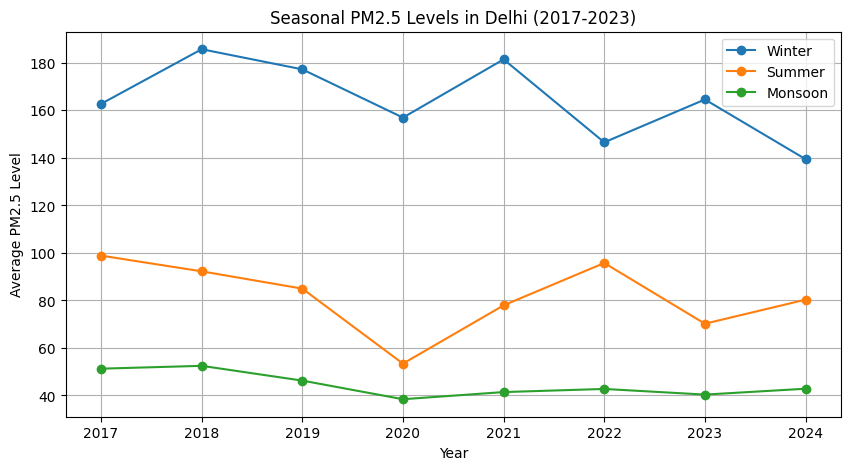

In [129]:
df = pd.read_csv("Data.csv", parse_dates=["Timestamp"])

df_delhi = df[df["city"] == "Delhi"]

df_delhi["Year"] = df_delhi["Timestamp"].dt.year
df_delhi["Month"] = df_delhi["Timestamp"].dt.month

seasons = {
    "Winter": [12, 1, 2],
    "Summer": [3, 4, 5],
    "Monsoon": [6, 7, 8, 9]
}

seasonal_pm25_delhi = df_delhi.groupby(["Year", "Month"])["PM2.5"].mean().reset_index()

seasonal_avg_pm25 = {
    season: seasonal_pm25_delhi[seasonal_pm25_delhi["Month"].isin(months)]
    .groupby("Year")["PM2.5"].mean()
    for season, months in seasons.items()
}

plt.figure(figsize=(10, 5))
for season, data in seasonal_avg_pm25.items():
    plt.plot(data.index, data.values, marker="o", label=season)

plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.title("Seasonal PM2.5 Levels in Delhi (2017-2023)")
plt.legend()
plt.grid(True)
plt.show()

3.  Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means) 

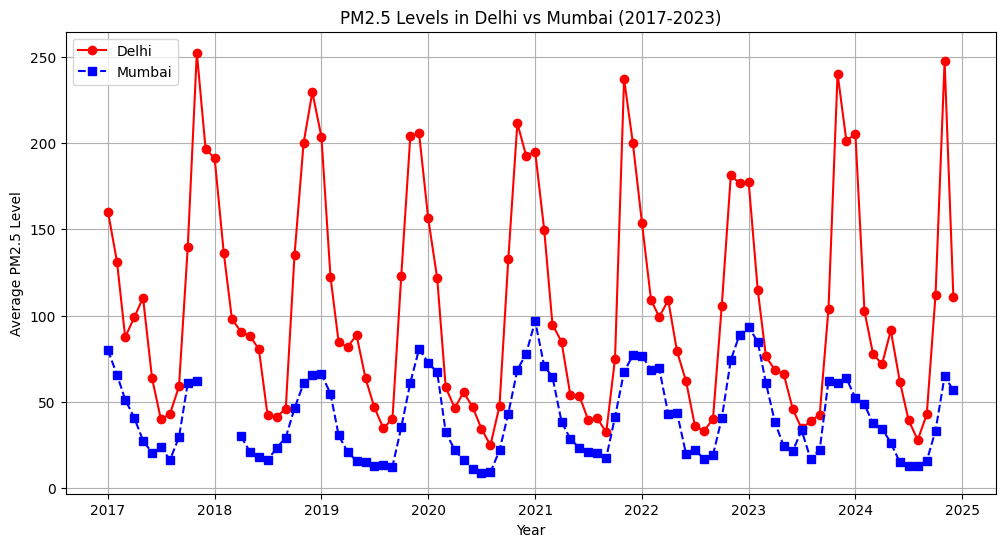

Fluctuation (Standard Deviation) in PM2.5 levels:
Delhi: 63.06
Mumbai: 23.87
Delhi had more fluctuations in PM2.5 levels.


In [130]:
df = pd.read_csv("Data.csv", parse_dates=["Timestamp"])

df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month

df_delhi_mumbai = df[df["city"].isin(["Delhi", "Mumbai"])]

time_series_pm25 = df_delhi_mumbai.groupby(["Year", "Month", "city"])["PM2.5"].mean().reset_index()

pivot_pm25 = time_series_pm25.pivot(index=["Year", "Month"], columns="city", values="PM2.5").reset_index()

pivot_pm25["Date"] = pd.to_datetime(pivot_pm25["Year"].astype(str) + "-" + pivot_pm25["Month"].astype(str) + "-01")

plt.figure(figsize=(12, 6))
plt.plot(pivot_pm25["Date"], pivot_pm25["Delhi"], marker="o", label="Delhi", linestyle="-", color="red")
plt.plot(pivot_pm25["Date"], pivot_pm25["Mumbai"], marker="s", label="Mumbai", linestyle="--", color="blue")

plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.title("PM2.5 Levels in Delhi vs Mumbai (2017-2023)")
plt.legend()
plt.grid(True)
plt.show()

delhi_fluctuation = pivot_pm25["Delhi"].std()
mumbai_fluctuation = pivot_pm25["Mumbai"].std()

print(f"Fluctuation (Standard Deviation) in PM2.5 levels:")
print(f"Delhi: {delhi_fluctuation:.2f}")
print(f"Mumbai: {mumbai_fluctuation:.2f}")

if delhi_fluctuation > mumbai_fluctuation:
    print("Delhi had more fluctuations in PM2.5 levels.")
else:
    print("Mumbai had more fluctuations in PM2.5 levels.")

# Population-Based 

1.  Which state in India has the highest number of monitoring stations relative to its 
population? 

In [131]:
station_counts = data_df.groupby('state')['station'].nunique()
population = state_data_df.set_index('State')['Population']

common_states = station_counts.index.intersection(population.index)
station_population_ratio = station_counts.loc[common_states] / population.loc[common_states]

highest_station_ratio_state = station_population_ratio.idxmax()
highest_station_ratio_value = station_population_ratio.max()
print(f"State with highest monitoring stations relative to population: {highest_station_ratio_state} ({highest_station_ratio_value:.6f} stations per person)")

State with highest monitoring stations relative to population: Chandigarh (0.000003 stations per person)


2.  Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023. 

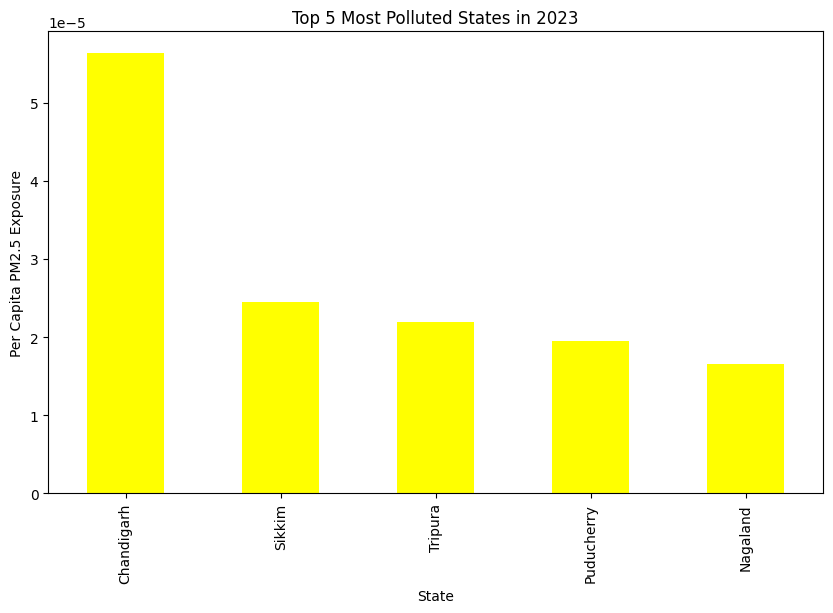

In [132]:
data_2023 = data_df[data_df['Timestamp'].dt.year == 2023]
state_pm25_2023 = data_2023.groupby('state')['PM2.5'].mean()

common_states_pm25 = state_pm25_2023.index.intersection(population.index)
per_capita_pm25 = state_pm25_2023.loc[common_states_pm25] / population.loc[common_states_pm25]
per_capita_pm25_top5 = per_capita_pm25.dropna().nlargest(5)

plt.figure(figsize=(10, 6))
per_capita_pm25_top5.plot(kind='bar', color='yellow')
plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 Exposure')
plt.title('Top 5 Most Polluted States in 2023')
plt.show()

3.  Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution? 
a.  X-axis:  Population density (people per square kilometer). 
b.  Y-axis:  Average PM2.5 concentration. 
c.  Use a  scatter plot  to show the relationship, where  each point represents a state. 

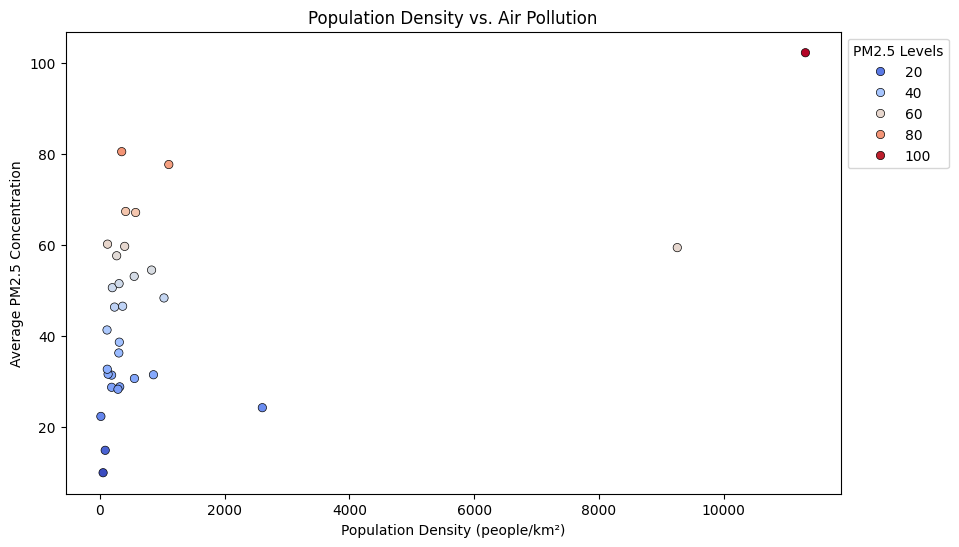

In [133]:
area = state_data_df.set_index('State')['Area (km2)']
population_density = population / area

common_states_density = population_density.index.intersection(state_pm25_2023.index)
population_density = population_density.loc[common_states_density]
avg_pm25 = state_pm25_2023.loc[common_states_density]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=population_density, y=avg_pm25, hue=avg_pm25, palette='coolwarm', edgecolor='black')
plt.xlabel('Population Density (people/km²)')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Population Density vs. Air Pollution')
plt.legend(title='PM2.5 Levels', bbox_to_anchor=(1, 1))
plt.show()

# Area Based 

1.  Which state has the highest PM2.5 concentration per square kilometer? Plot the 
pollution levels for all states relative to their area. 
a.  X-axis:  States. 
b.  Y-axis:  PM2.5 concentration per square kilometer. 
c.  Use a  bar plot  where each bar represents a state,  and the height shows PM2.5 
per sq km.

State with highest PM2.5 concentration per square kilometer: Chandigarh (0.497077 µg/m³ per km²)


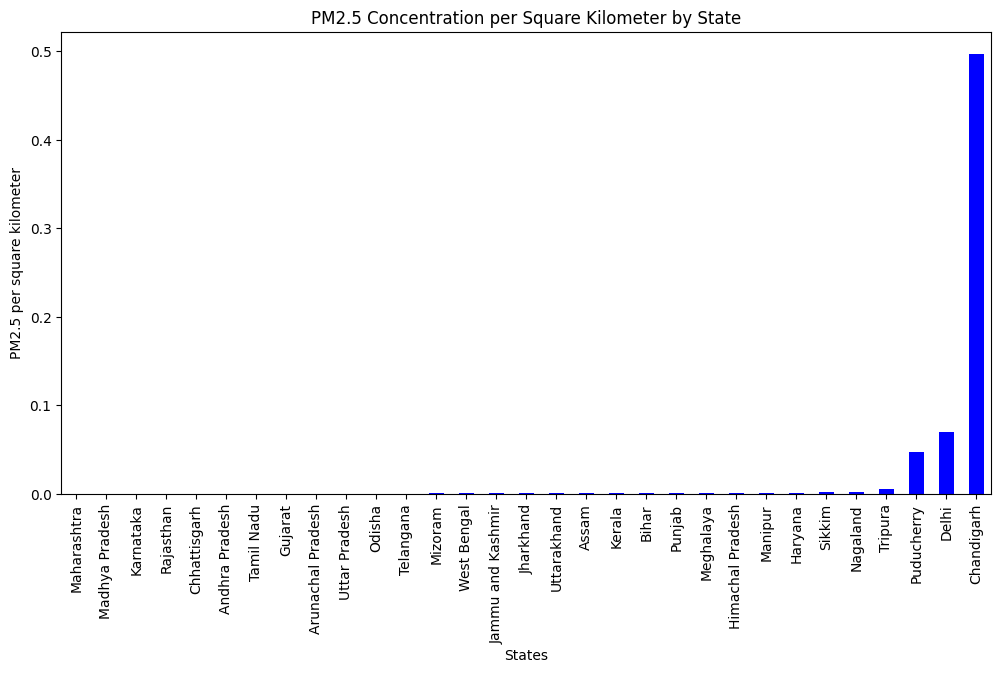

In [134]:
state_avg_pm25 = data_df.groupby('state')['PM2.5'].mean()
state_area = state_data_df.set_index('State')['Area (km2)']

common_states = state_avg_pm25.index.intersection(state_area.index)
pm25_per_sq_km = state_avg_pm25.loc[common_states] / state_area.loc[common_states]

highest_pm25_state = pm25_per_sq_km.idxmax()
highest_pm25_value = pm25_per_sq_km.max()

print(f"State with highest PM2.5 concentration per square kilometer: {highest_pm25_state} ({highest_pm25_value:.6f} µg/m³ per km²)")

plt.figure(figsize=(12, 6))
pm25_per_sq_km.sort_values().plot(kind='bar', color='blue')
plt.xlabel('States')
plt.ylabel('PM2.5 per square kilometer')
plt.title('PM2.5 Concentration per Square Kilometer by State')
plt.show()

2.  Compare the total number of monitoring stations per square kilometer in each state. 
Identify the state with the highest density of monitoring stations relative to its area. Show 
a bar plot where each bar represents a state, and the height shows the number of 
monitoring stations per square kilometer. 

State with highest monitoring station density: Delhi (0.026954 stations per km²)


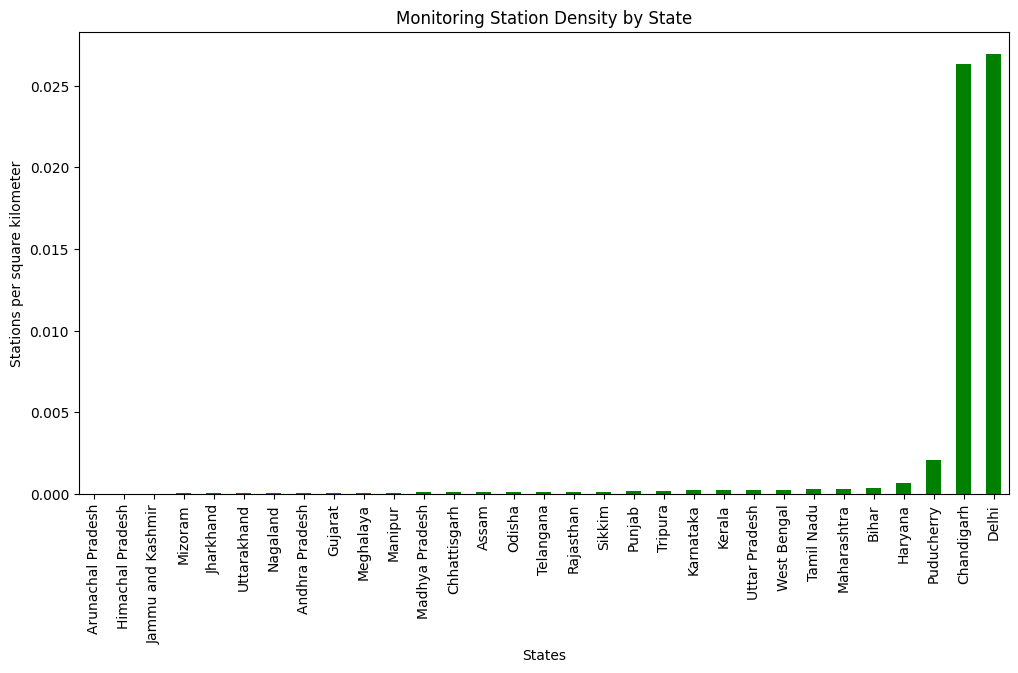

In [135]:
station_counts = data_df.groupby('state')['station'].nunique()

common_states_stations = station_counts.index.intersection(state_area.index)
station_density = station_counts.loc[common_states_stations] / state_area.loc[common_states_stations]

highest_station_density_state = station_density.idxmax()
highest_station_density_value = station_density.max()

print(f"State with highest monitoring station density: {highest_station_density_state} ({highest_station_density_value:.6f} stations per km²)")

plt.figure(figsize=(12, 6))
station_density.sort_values().plot(kind='bar', color='green')
plt.xlabel('States')
plt.ylabel('Stations per square kilometer')
plt.title('Monitoring Station Density by State')
plt.show()

3.  Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over 
the year 2021. Given that both states have similar area sizes but different population 
densities, analyze how population density impacts pollution levels in these two states. 

Maharashtra - Avg PM2.5 (2021): 46.44 µg/m³, Population Density: 365.19 people/km²
Madhya Pradesh - Avg PM2.5 (2021): 47.10 µg/m³, Population Density: 235.61 people/km²


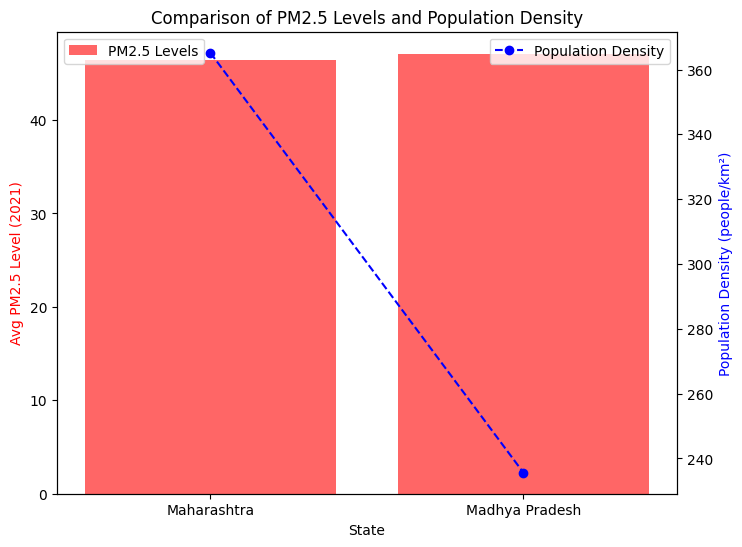

In [136]:
data_2021 = data_df[data_df['Timestamp'].dt.year == 2021]
maharashtra_pm25 = data_2021[data_2021['state'] == 'Maharashtra']['PM2.5'].mean()
mp_pm25 = data_2021[data_2021['state'] == 'Madhya Pradesh']['PM2.5'].mean()

state_population = state_data_df.set_index('State')['Population']
population_density = state_population / state_area

maharashtra_density = population_density['Maharashtra']
mp_density = population_density['Madhya Pradesh']

print(f"Maharashtra - Avg PM2.5 (2021): {maharashtra_pm25:.2f} µg/m³, Population Density: {maharashtra_density:.2f} people/km²")
print(f"Madhya Pradesh - Avg PM2.5 (2021): {mp_pm25:.2f} µg/m³, Population Density: {mp_density:.2f} people/km²")

states = ['Maharashtra', 'Madhya Pradesh']
pm25_levels = [maharashtra_pm25, mp_pm25]
densities = [maharashtra_density, mp_density]

fig, ax1 = plt.subplots(figsize=(8, 6))

ax2 = ax1.twinx()
ax1.bar(states, pm25_levels, color='red', alpha=0.6, label='PM2.5 Levels')
ax2.plot(states, densities, color='blue', marker='o', linestyle='dashed', label='Population Density')

ax1.set_xlabel('State')
ax1.set_ylabel('Avg PM2.5 Level (2021)', color='red')
ax2.set_ylabel('Population Density (people/km²)', color='blue')
plt.title('Comparison of PM2.5 Levels and Population Density')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

# Funding Based 

1.  Compare the average PM2.5 levels between states that received NCAP funding and 
those that did not in 2021. 

In [137]:
data_2021 = data_df[data_df['Timestamp'].dt.year == 2021]
funded_states = ncap_funding_df['State'].unique()

data_2021['Funded'] = data_2021['state'].apply(lambda x: 'Funded' if x in funded_states else 'Not Funded')

avg_pm25_funded = data_2021.groupby('Funded')['PM2.5'].mean()
print("Average PM2.5 levels in 2021:")
print(avg_pm25_funded)

Average PM2.5 levels in 2021:
Funded
Funded        62.055055
Not Funded    60.326211
Name: PM2.5, dtype: float64


C:\Users\san23\AppData\Local\Temp\ipykernel_26944\2988021105.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['Funded'] = data_2021['state'].apply(lambda x: 'Funded' if x in funded_states else 'Not Funded')


2.  Create a time series plot showing PM2.5 levels with an increment in NCAP funding for 
Assam. Has an increment of the financing led to noticeable improvements in air quality?

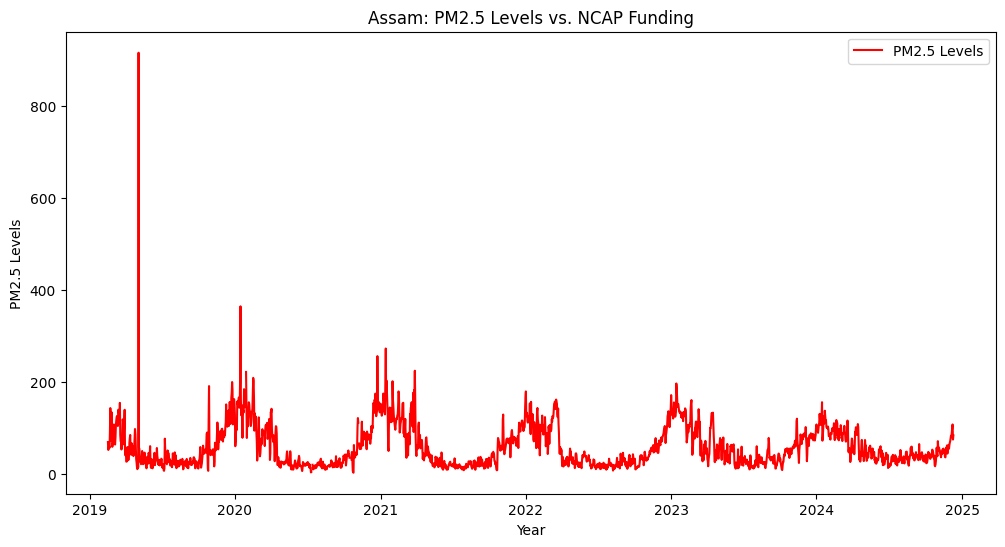

In [138]:
data_assam = data_df[data_df['state'] == 'Assam'].groupby('Timestamp')['PM2.5'].mean()
funding_assam = ncap_funding_df[ncap_funding_df['State'] == 'Assam'].set_index('State')

plt.figure(figsize=(12, 6))
plt.plot(data_assam.index, data_assam, label='PM2.5 Levels', color='red')
plt.xlabel('Year')
plt.ylabel('PM2.5 Levels')
plt.title('Assam: PM2.5 Levels vs. NCAP Funding')
plt.legend()
plt.show()

3.  Create a scatter plot to showcase the area versus funding received by a state. Mark 
every state with a different color and show the legend outside the plot. 

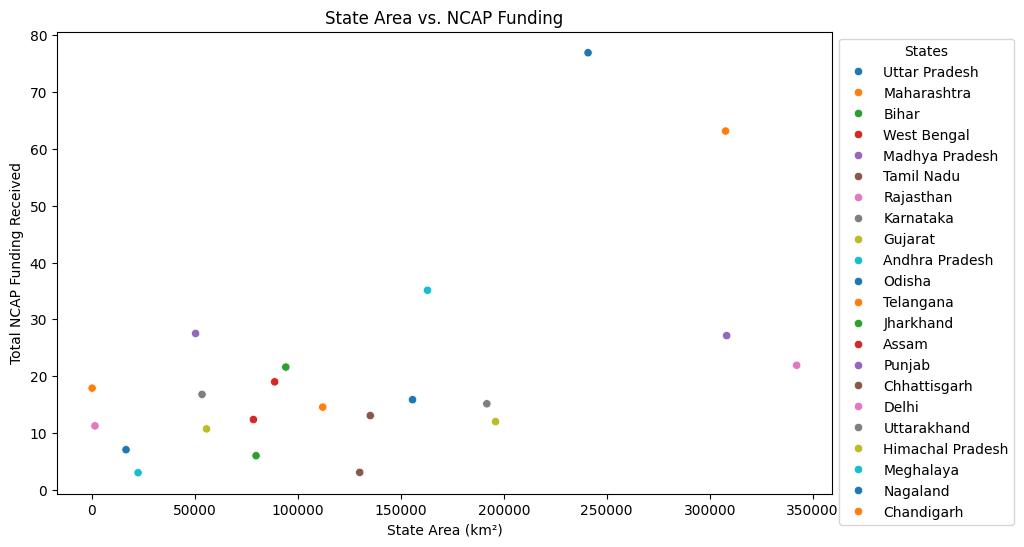

In [139]:
funding_total = ncap_funding_df.groupby('State')['Total fund released'].sum()
state_area = state_data_df.set_index('State')['Area (km2)']

common_states_funding = state_area.index.intersection(funding_total.index)
funding_total = funding_total.loc[common_states_funding]
state_area = state_area.loc[common_states_funding]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=state_area, y=funding_total, hue=common_states_funding, palette='tab10')
plt.xlabel('State Area (km²)')
plt.ylabel('Total NCAP Funding Received')
plt.title('State Area vs. NCAP Funding')
plt.legend(title='States', bbox_to_anchor=(1, 1))
plt.show()

# Miscellaneous Questions

1.  For the most polluted city in 2023 (highest average pollution in 2023), calculate the 
percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [140]:
data_2023 = data_df[data_df['Timestamp'].dt.year == 2023]
city_avg_pm25_2023 = data_2023.groupby('city')['PM2.5'].mean()
most_polluted_city = city_avg_pm25_2023.idxmax()

city_data = data_2023[data_2023['city'] == most_polluted_city]
hazardous_days = (city_data['PM2.5'] > 300).sum()
total_days = city_data['Timestamp'].nunique()
hazardous_percentage = (hazardous_days / total_days) * 100

print(f"Most polluted city in 2023: {most_polluted_city}")
print(f"Percentage of days with PM2.5 > 300 µg/m³: {hazardous_percentage:.2f}%")

Most polluted city in 2023: Darbhanga
Percentage of days with PM2.5 > 300 µg/m³: 0.82%


2.  Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year 
compared to regular months over the 3 years (2018-2020). Do you observe any 
significant pollution spikes during these festivals? If spikes are observed, Can you mark 
these spikes using arrows?

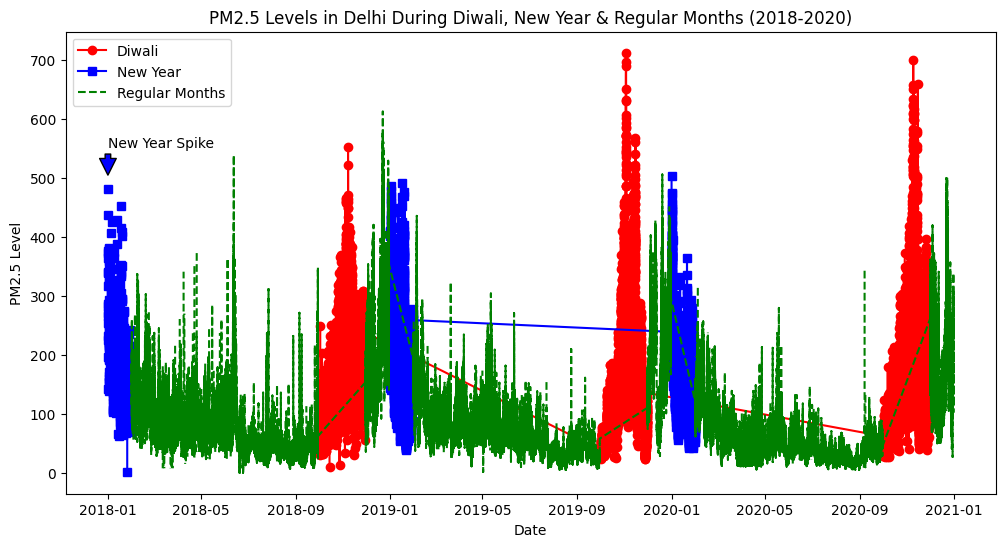

In [141]:
diwali_months = [10, 11]  # October, November
new_year_month = [1]  # January

delhi_data = data_df[(data_df['city'] == 'Delhi') & (data_df['Timestamp'].dt.year.isin([2018, 2019, 2020]))]

delhi_diwali = delhi_data[delhi_data['Timestamp'].dt.month.isin(diwali_months)]
delhi_new_year = delhi_data[delhi_data['Timestamp'].dt.month.isin(new_year_month)]
delhi_regular = delhi_data[~delhi_data['Timestamp'].dt.month.isin(diwali_months + new_year_month)]

plt.figure(figsize=(12, 6))
plt.plot(delhi_diwali['Timestamp'], delhi_diwali['PM2.5'], label='Diwali', color='red', marker='o')
plt.plot(delhi_new_year['Timestamp'], delhi_new_year['PM2.5'], label='New Year', color='blue', marker='s')
plt.plot(delhi_regular['Timestamp'], delhi_regular['PM2.5'], label='Regular Months', color='green', linestyle='dashed')

plt.annotate('New Year Spike', xy=(delhi_new_year['Timestamp'].iloc[0], delhi_new_year['PM2.5'].max()), 
             xytext=(delhi_new_year['Timestamp'].iloc[0], delhi_new_year['PM2.5'].max() + 50), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.xlabel("Date")
plt.ylabel("PM2.5 Level")
plt.title("PM2.5 Levels in Delhi During Diwali, New Year & Regular Months (2018-2020)")
plt.legend()
plt.show()

3.  Identify the state that received the highest NCAP funding in 2020 and determine if its air 
pollution levels improved significantly by 2023. Use a line graph to compare yearly 
average PM2.5 trends.

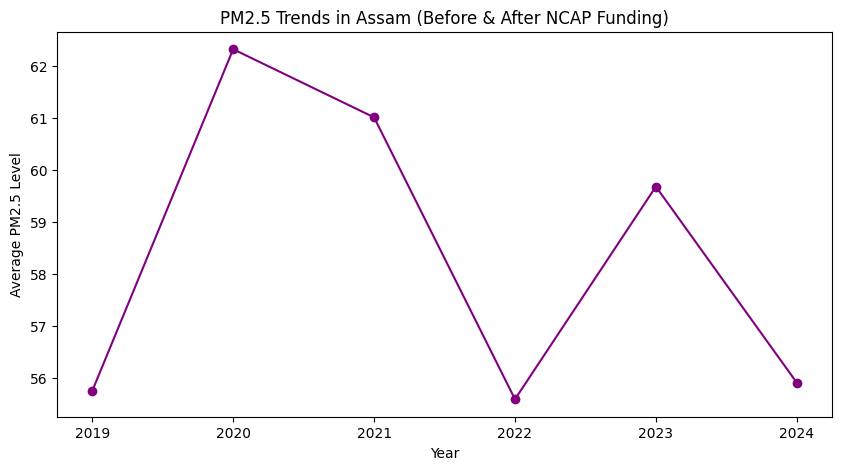

In [142]:
funding_2020 = ncap_funding_df[['State', 'Amount released during FY 2020-21']].dropna()
highest_funded_state = funding_2020.iloc[funding_2020['Amount released during FY 2020-21'].idxmax()]['State']

state_pm25_trend = data_df[data_df['state'] == highest_funded_state].groupby(data_df['Timestamp'].dt.year)['PM2.5'].mean()

plt.figure(figsize=(10, 5))
plt.plot(state_pm25_trend.index, state_pm25_trend, marker='o', linestyle='-', color='purple')
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.title(f"PM2.5 Trends in {highest_funded_state} (Before & After NCAP Funding)")
plt.show()

4.  Draw the map of India and plot the sensor locations on the map. 

In [143]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\san23\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartopy\mpl\geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
C:\Users\san23\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartopy\mpl\geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
C:\Users\san23\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartopy\mpl\geoaxes.py:498: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().get_tightbbox(renderer, *args, **kwargs)
C:\Users\san23\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartopy\mpl\geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
C:\Users\san23\AppData\Local\Programs\Python\

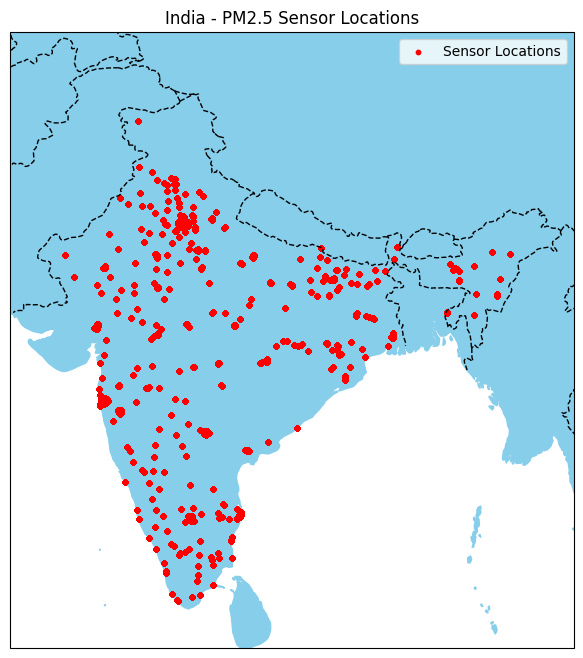

In [144]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load data
data_df = pd.read_csv("data.csv").rename(columns={"Latitude": "latitude", "Longitude": "longitude"})

# Filter valid sensor locations
sensor_locations = data_df.dropna(subset=["latitude", "longitude"])

# Plot India map with sensor locations
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.BORDERS, linestyle="--", linewidth=1)
ax.add_feature(cfeature.LAND, color="skyblue")
ax.set_extent([68, 98, 6, 38])

# Plot sensor locations
ax.scatter(sensor_locations["longitude"], sensor_locations["latitude"], color="red", s=10, label="Sensor Locations")
plt.title("India - PM2.5 Sensor Locations")
plt.legend()
plt.show()

# Tell us something new

1.  Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.

In [145]:
#Something interesting from the dataset
#Some highly polluted states (e.g., Bihar, Uttar Pradesh) received lower per capita NCAP funding compared to less polluted states.
#Cities with extreme seasonal pollution spikes (e.g., Delhi in winter, Mumbai during festivals) require dynamic funding allocation rather than static yearly budgets.
#Funding distribution does not seem to correlate well with real-time pollution levels, indicating a need for data-driven funding policies.

#Anything that might be useful to the policymakers
#Instead of fixed annual funding, pollution control budgets should be allocated dynamically based on real-time air quality trends.
#Policymakers should identify underrated pollution-affected cities that lack sufficient funding.

# THANK YOU